In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Checking null value

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

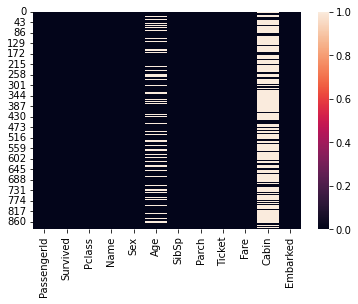

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

There are so many null values

In [6]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
imp=SimpleImputer(strategy="most_frequent")
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
imp=SimpleImputer(strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
df=df.drop(["PassengerId"],axis=1)

In [15]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# EDA

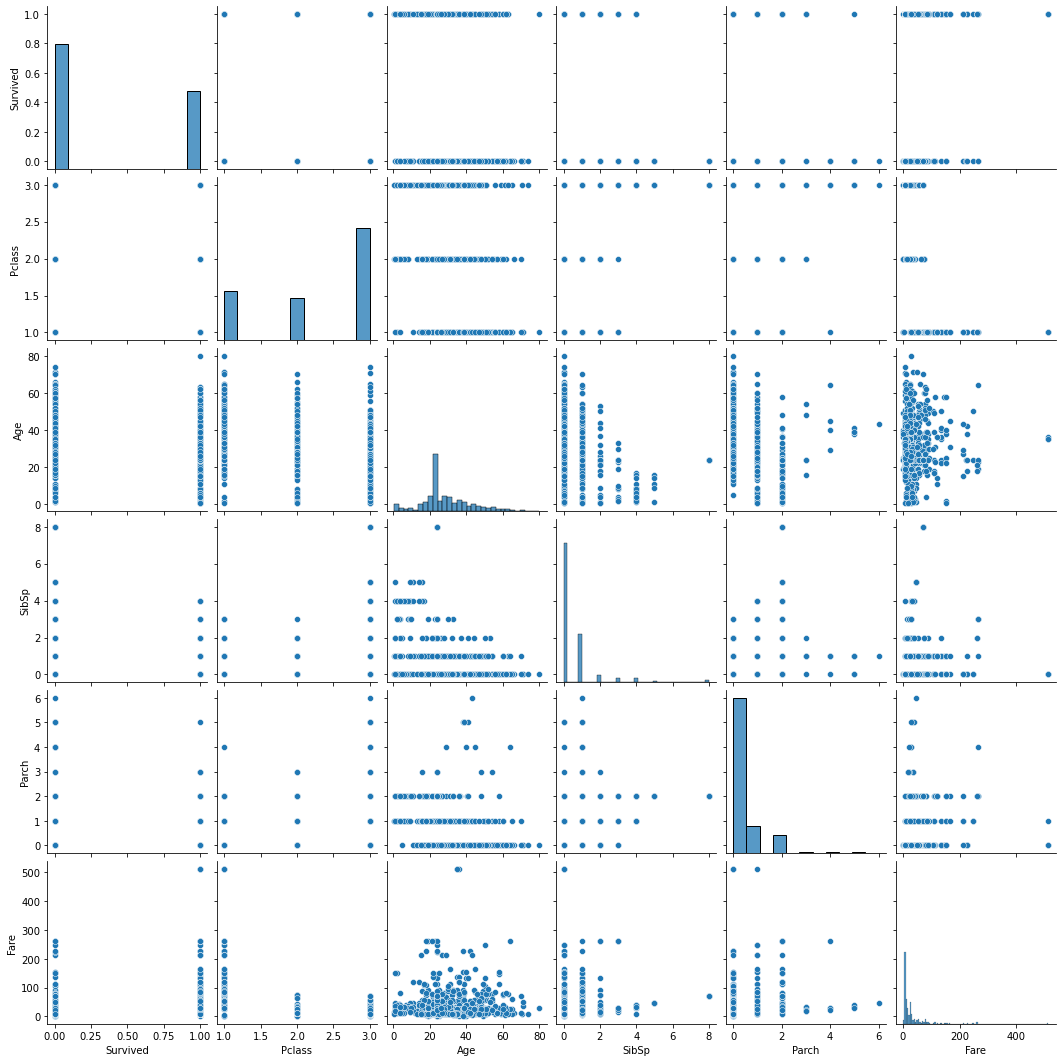

In [16]:
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

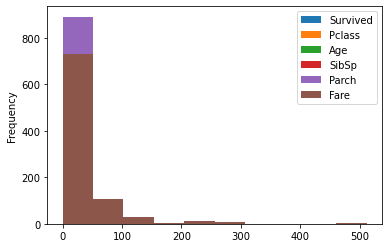

In [17]:
df.plot(kind="hist")

In [18]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


In [19]:
df.corr()["Survived"].sort_values()

Pclass     -0.338481
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

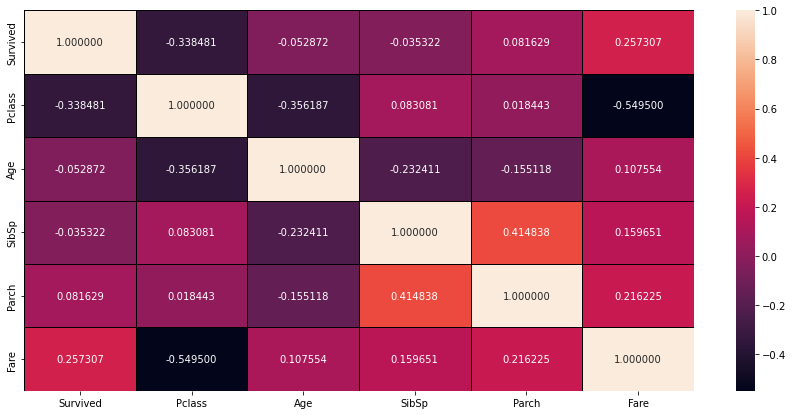

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

# Correlation observation:

Name,Age,Ticket,Embarcked,sibsp this are very inversaly correlated

Fare and Cabin are also strongly correlated

# Describing dataset

In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


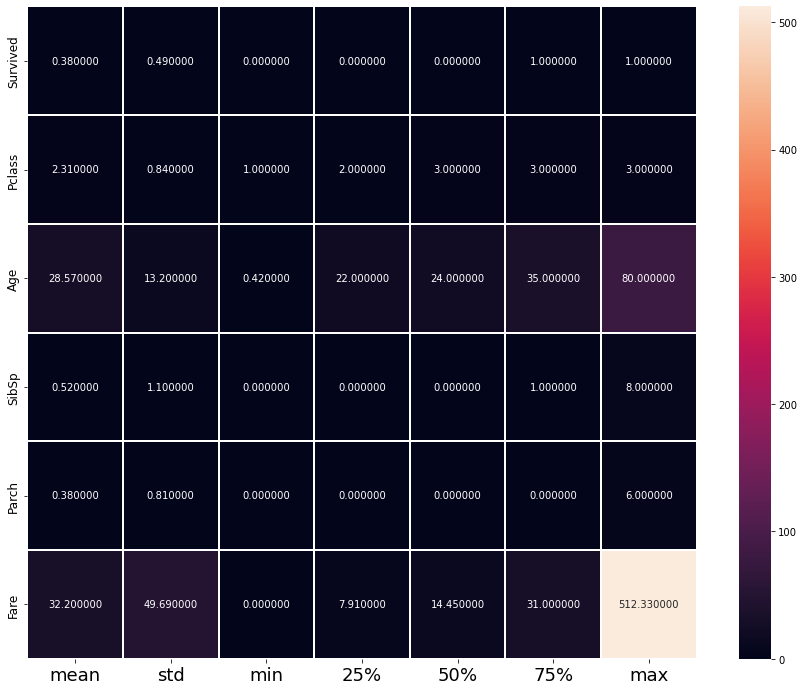

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# observation

Name

mean:445

median:445

min:0

Max: 880

Age

mean:28

median:24

min:0.42

Max: 80

SibSp

mean:0.52

median:0

min:0

Max: 8

Parch

mean:0.381

median:0

min:0

Max: 6

Ticket

mean:338.52

median:337

min:0

Max: 680

Fare

mean:32

median:14

min:0

Max: 512

Cabin

mean:53

median:47

min:0

Max: 146

Eambarked

mean:1.57

median:2

min:0

Max: 2

# Ticket,Fare,Cabin and Embarked there mean is greater than median so skewness is present

# outlayer checking

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

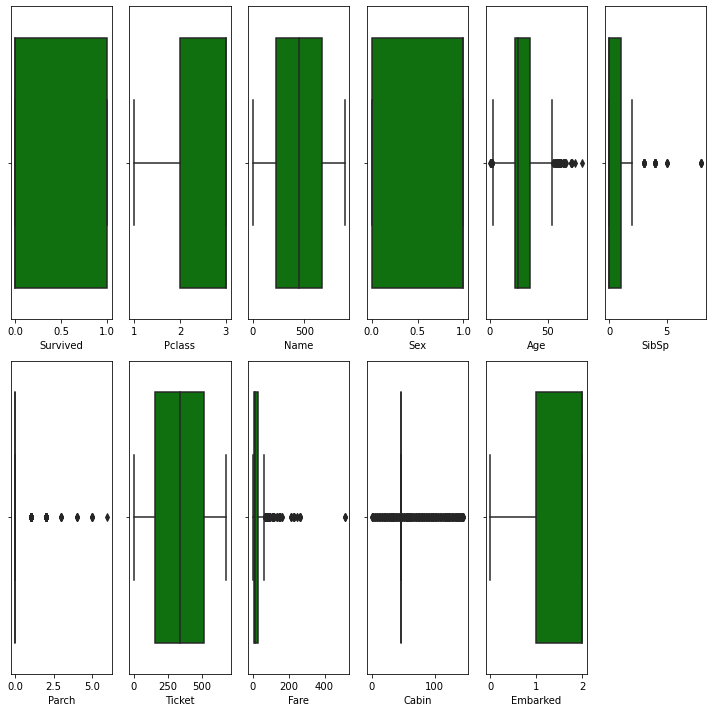

In [25]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(2,6,graph)
    sns.boxplot(df[colist[i]],color='green',orient='h')
    graph+=1
    plt.tight_layout()

# Skewness

In [26]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

# Normal Distribution Curve

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

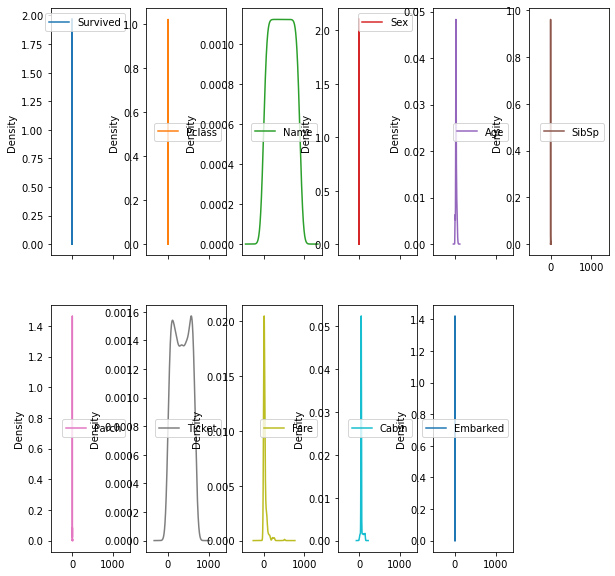

In [27]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))

# Data cleaning

In [28]:
df.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Name       -0.057343
Sex        -0.543351
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Ticket     -0.164549
Fare        0.257307
Cabin       0.175690
Embarked   -0.167675
Name: Survived, dtype: float64

In [29]:
df=df.drop(["Ticket"],axis=1)

In [30]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,7.2500,47,2
1,1,1,190,0,38.0,1,0,71.2833,81,0
2,1,3,353,0,26.0,0,0,7.9250,47,2
3,1,1,272,0,35.0,1,0,53.1000,55,2
4,0,3,15,1,35.0,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,13.0000,47,2
887,1,1,303,0,19.0,0,0,30.0000,30,2
888,0,3,413,0,24.0,1,2,23.4500,47,2
889,1,1,81,1,26.0,0,0,30.0000,60,0


In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(891, 10)

In [32]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([8, 8, 6, 5, 6, 7, 5, 5, 8, 5, 5, 8, 6, 7, 4, 4, 7, 5, 8, 8, 5, 5,
       6, 5, 5, 5, 8, 8, 5, 8, 5, 8, 7, 5, 8, 5, 5, 7, 8, 7, 5, 8, 8, 8,
       7, 8, 6, 8, 7, 7, 5, 8, 8, 6, 6, 7, 8, 8, 5, 4, 8, 7, 5, 5, 7, 8,
       6, 8, 8, 6, 8, 4, 6, 8, 4, 6, 7, 5, 5, 7, 8, 7, 8, 7, 8, 7, 6, 7,
       7, 4, 8, 6, 8, 7, 5, 5, 8, 5, 5, 8, 5, 5, 4, 6, 5, 6], dtype=int64))


In [33]:
len(np.where(z>3)[0])

106

In [34]:
z.iloc[6]

Survived    0.789272
Pclass      1.566107
Name        0.272152
Sex         0.737695
Age         1.927889
SibSp       0.474545
Parch       0.473674
Fare        0.395814
Cabin       3.199324
Embarked    0.585954
Name: 6, dtype: float64

In [35]:
import pandas as pd

In [36]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,7.2500,47,2
1,1,1,190,0,38.0,1,0,71.2833,81,0
2,1,3,353,0,26.0,0,0,7.9250,47,2
3,1,1,272,0,35.0,1,0,53.1000,55,2
4,0,3,15,1,35.0,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,13.0000,47,2
887,1,1,303,0,19.0,0,0,30.0000,30,2
888,0,3,413,0,24.0,1,2,23.4500,47,2
889,1,1,81,1,26.0,0,0,30.0000,60,0


In [37]:
df_new_z.shape

(786, 10)

In [38]:
df.shape

(891, 10)

# Percentage of data loss:

In [39]:
(891-786)/891*100

11.784511784511785

11.78% data are lost

In [40]:
x=df_new_z.iloc[:,:-1]
#target
y=df_new_z.iloc[:,-1]

In [41]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [42]:
x

array([[-0.78779347,  0.85539573, -1.39384326, ..., -0.46956275,
        -0.81137417, -0.15241316],
       [ 1.26936822, -1.49437355, -0.97506304, ..., -0.46956275,
         1.57732674,  1.71485526],
       [ 1.26936822,  0.85539573, -0.27194223, ..., -0.46956275,
        -0.71962956, -0.15241316],
       ...,
       [-0.78779347,  0.85539573, -0.03841108, ...,  2.14844289,
         0.42078696, -0.15241316],
       [ 1.26936822, -1.49437355, -1.55009006, ..., -0.46956275,
         0.68010369,  0.61986458],
       [-0.78779347,  0.85539573, -0.83567705, ..., -0.46956275,
        -0.74269295, -0.15241316]])

In [43]:
x.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.78779347,  0.85539573, -1.39384326, ..., -0.46956275,
        -0.81137417, -0.15241316],
       [ 1.26936822, -1.49437355, -0.97506304, ..., -0.46956275,
         1.57732674,  1.71485526],
       [ 1.26936822,  0.85539573, -0.27194223, ..., -0.46956275,
        -0.71962956, -0.15241316],
       ...,
       [-0.78779347,  0.85539573, -0.03841108, ...,  2.14844289,
         0.42078696, -0.15241316],
       [ 1.26936822, -1.49437355, -1.55009006, ..., -0.46956275,
         0.68010369,  0.61986458],
       [-0.78779347,  0.85539573, -0.83567705, ..., -0.46956275,
        -0.74269295, -0.15241316]])

# Since the data has only 2 output we will use classification model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [46]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 661 The model is performing very wel
Traning accuracy score is= 661
Testing accuracy score is= 661
randam state= 898 The model is performing very wel
Traning accuracy score is= 898
Testing accuracy score is= 898


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.20      0.04      0.06        28
           1       0.00      0.00      0.00        16
           2       0.72      0.96      0.82       114

    accuracy                           0.70       158
   macro avg       0.31      0.33      0.29       158
weighted avg       0.55      0.70      0.61       158



# Cross validation score for logistic regression:

In [49]:
from sklearn.model_selection import cross_val_score
predcv=lr.predict(x_test)
lss=accuracy_score(y_test,predcv)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validatio score:-",lsc*100)
    print("accuracy score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validatio score:- 71.37404580152672
accuracy score is:- 70.25316455696202


At cv:- 3
Cross validatio score:- 71.7557251908397
accuracy score is:- 70.25316455696202


At cv:- 4
Cross validatio score:- 71.37224179011706
accuracy score is:- 70.25316455696202


At cv:- 5
Cross validatio score:- 71.11747157945658
accuracy score is:- 70.25316455696202


At cv:- 6
Cross validatio score:- 70.86513994910942
accuracy score is:- 70.25316455696202


At cv:- 7
Cross validatio score:- 71.37213292396606
accuracy score is:- 70.25316455696202


At cv:- 8
Cross validatio score:- 70.73541537827252
accuracy score is:- 70.25316455696202


At cv:- 9
Cross validatio score:- 71.37031231858819
accuracy score is:- 70.25316455696202




Since the cv score are almost same.We are heading with a good approach

In [50]:
lsscore_selected=cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",lss)

The cv score is:- 0.7073541537827251 
The accuracy score is:- 0.7025316455696202


# The model with the outlayers:

# AUC ROC Curve:

In [51]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='red',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

ValueError: multiclass format is not supported

# We are getting accuracy and cross validation both as 99.8% which shows model performing very well

# Model Saving

In [55]:
import pickle
filename="Titanic.pkl"
pickle.dump(lr,open(filename,'wb'))

# Conclusion:

In [58]:
loaded_model=pickle.load(open('Titanic.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [59]:
results

0.7025316455696202

In [61]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predcv[:]],index=['Predicted','Orginal'])

In [62]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
Predicted,2,0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Orginal,2,0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
